# SQL for Data Analysis
<hr>

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL-Aggregations" data-toc-modified-id="SQL-Aggregations-1">SQL Aggregations</a></span></li><li><span><a href="#COUNT" data-toc-modified-id="COUNT-2">COUNT</a></span></li><li><span><a href="#SUM" data-toc-modified-id="SUM-3">SUM</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-3.0.1">Practice Questions</a></span></li></ul></li></ul></li><li><span><a href="#MIN-and-MAX" data-toc-modified-id="MIN-and-MAX-4">MIN and MAX</a></span></li><li><span><a href="#AVERAGE-(AVG)" data-toc-modified-id="AVERAGE-(AVG)-5">AVERAGE (AVG)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-5.0.1">Practice Questions</a></span></li></ul></li></ul></li><li><span><a href="#GROUP-BY" data-toc-modified-id="GROUP-BY-6">GROUP BY</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-6.0.1">Practice Questions</a></span></li></ul></li></ul></li><li><span><a href="#GROUP-BY-Multiple-Columns" data-toc-modified-id="GROUP-BY-Multiple-Columns-7">GROUP BY Multiple Columns</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-7.0.1">Practice Questions</a></span></li></ul></li></ul></li><li><span><a href="#DISTINCT" data-toc-modified-id="DISTINCT-8">DISTINCT</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-8.0.1">Practice Questions</a></span></li></ul></li></ul></li><li><span><a href="#HAVING" data-toc-modified-id="HAVING-9">HAVING</a></span><ul class="toc-item"><li><span><a href="#Difference-between-WHERE-and-HAVING-statements" data-toc-modified-id="Difference-between-WHERE-and-HAVING-statements-9.1">Difference between WHERE and HAVING statements</a></span><ul class="toc-item"><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-9.1.1">Practice Questions</a></span></li></ul></li></ul></li><li><span><a href="#DATE-Formats" data-toc-modified-id="DATE-Formats-10">DATE Formats</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-10.0.1">Practice Questions</a></span></li></ul></li></ul></li><li><span><a href="#CASE-Statements" data-toc-modified-id="CASE-Statements-11">CASE Statements</a></span></li></ul></div>

## SQL Aggregations

+ **COUNT**      
    + counts how many rows are in a particular column.


+ **SUM**        
    + add all values in a particular column.


+ **MIN and MAX** 
    + returns the lowest and highest values in a particular column.


+ **AVERAGE**    
    + calculates the average of all the values in a particular column.


+ **NULL**       
    + a datatype that specifies where no data exists in SQL. It is different from a               zero or a space.


><i>Aggregators only aggregate vertically - the values of a column. If you want to perform a calculation across rows, you would do this with simple arithmetic<i>.

When identifying NULLs in a WHERE clause, we write **IS NULL** or **IS NOT NULL**. We don't use '=', because NULL isn't considered a value in SQL. Rather, it is a property of the data.

**Example:**
```sql
SELECT *
FROM accounts
WHERE primary_poc IS NULL;
```

## COUNT

**Example:** 

Find the number of rows in the accounts table.
```sql    
SELECT COUNT(*) 
FROM accounts;
```
Alternative method which returns the same result (if there are no NULL values in the id column):
```sql
SELECT COUNT(accounts.id)
FROM accounts;
```   
>COUNT does not consider rows that have NULL values. This can be useful for quickly identifying which rows have missing data. 

COUNT can help us identify the number of non-null records in an individual column. If the COUNT result of a column matches the number of rows in a table, there are no NULLs in the column. If the COUNT result of a column is less than the number of rows in the table, we know the difference is the number of NULLs. 

**Example:**
```sql
SELECT COUNT(*) AS account_count
FROM accounts
```
<i>The above returns account_count : 354</i>
```sql
SELECT COUNT(id) AS account_id_count
FROM accounts
```
<i>The above returns account_id_count : 354; therefore there are no NULLs in the 'account id' column</i>. 

## SUM

>You cannot use SUM(*) the way you can use COUNT(*).
SUM is only for columns that have quantitative data. COUNT works on any column.
SUM will ignore NULL values.

**Example:**
```sql
SELECT SUM(standard_qty) AS standard,
       SUM(gloss_qty) AS gloss,
       SUM(poster_qty) AS poster
FROM orders;
```
<i>This will return the total order quantity of each column</i>.

#### Practice Questions

1. Find the total amount of poster_qty paper ordered in the orders table.
```sql
SELECT SUM(poster_qty) AS total_poster_sales
FROM orders;
```
2. Find the total dollar amount of sales using the total_amt_usd in the orders table.
```sql
SELECT SUM(total_amt_usd) AS total_dollar_sales
FROM orders;
```
3. Find the total amount spent on standard_amt_usd and gloss_amt_usd paper for each order in the orders table. This should give a dollar amount for each order in the table.
```sql
SELECT standard_amt_usd + gloss_amt_usd AS total_standard_gloss
FROM orders;
```
4. Find the standard_amt_usd per unit of standard_qty paper. Your solution should use both an aggregation and a mathematical operator.
```sql
SELECT SUM(standard_amt_usd)/SUM(standard_qty) AS standard_price_per_unit
FROM orders;
```

## MIN and MAX

>MIN and MAX are similar to other aggregators in that they ignore NULL values.

>Functionally, MIN and MAX are similar to COUNT in that they can be used on non-numerical columns. Depending on the column type, MIN will return the lowest number, earliest date, or non-numerical value as early in the alphabet as possible. MAX does the opposite — it returns the highest number, the latest date, or the non-numerical value closest alphabetically to “Z.”

**Example:**
```sql
SELECT MIN(standard_qty) AS standard_min,
       MIN(gloss_qty) AS gloss_min,
       MIN(poster_qty) AS poster_min,
       MAX(standard_qty) AS standard_max,
       MAX(gloss_qty) AS gloss_max,
       MAX(poster_qty) AS poster_max
FROM orders;
```

## AVERAGE (AVG)

>AVG returns the mean of the data - that is the sum of all of the values in the column divided by the number of values in a column. This aggregate function again ignores the NULL values in both the numerator and the denominator.

**Example:**
```sql
SELECT AVG(standard_qty) AS standard_avg,
       AVG(gloss_qty) AS gloss_avg,
       AVG(poster_qty) AS poster_avg
FROM orders;
```

#### Practice Questions

1. When was the earliest order ever placed? You only need to return the date.
```sql
SELECT MIN(occurred_at) 
FROM orders;
```
2. Try performing the same query as in question 1 without using an aggregation function. 
```sql
SELECT occurred_at 
FROM orders 
ORDER BY occurred_at
LIMIT 1;
```
3. When did the most recent (latest) web_event occur?
```sql
SELECT MAX(occurred_at)
FROM web_events;
```
4. Try to perform the result of the previous query without using an aggregation function.
```sql
SELECT occurred_at
FROM web_events
ORDER BY occurred_at DESC
LIMIT 1;
```
5. Find the mean (AVERAGE) amount spent per order on each paper type, as well as the mean 
amount of each paper type purchased per order. Your final answer should have 6 values 
\- one for each paper type for the average number of sales, as well as the average amount.
```sql
SELECT AVG(standard_qty) mean_standard, AVG(gloss_qty) mean_gloss, 
       AVG(poster_qty) mean_poster, AVG(standard_amt_usd) mean_standard_usd, 
       AVG(gloss_amt_usd) mean_gloss_usd, AVG(poster_amt_usd) mean_poster_usd
FROM orders;
```
6. You might be interested in how to calculate the MEDIAN. Though this is more advanced than what we have covered so far try finding - what is the MEDIAN total_usd spent on all orders? (This is a popular interview question)
```sql
SELECT *
FROM (SELECT total_amt_usd
      FROM orders
      ORDER BY total_amt_usd
      LIMIT 3457) AS Table1
ORDER BY total_amt_usd DESC
LIMIT 2;
```    
Since there are 6912 orders - we want the average of the 3457 and 3456 order amounts when ordered. This is the average of 2483.16 and 2482.55. This gives the median of 2482.855. This obviously isn't an ideal way to compute. If we obtain new orders, we would have to change the limit. SQL didn't even calculate the median for us. The above used a SUBQUERY, but you could use any method to find the two necessary values, and then you just need the average of them.

## GROUP BY

>'GROUP BY' allows creating segments that will aggregate independent from one another.

>'GROUP BY' clause goes in-between the 'WHERE' and 'ORDER BY' clause.

>Whenever there's a field in the SELECT statement that's not being aggregated, the query expects it to be in the GROUP BY clause.

**Example:**

Create a separate set of sums of each type of paper ordered for each account id
```sql
SELECT account_id,
       SUM(standard_qty) AS standard_sum,
       SUM(gloss_qty) AS gloss_sum,
       SUM(poster_qty) AS poster_sum
FROM orders
GROUP BY account_id
ORDER BY account_id;
```

#### Practice Questions

1. Which account (by name) placed the earliest order? Your solution should have the account name and the date of the order.
```sql
SELECT a.name, o.occurred_at
FROM accounts a
JOIN orders o
ON a.id = o.account_id
ORDER BY occurred_at
LIMIT 1;
```
2. Find the total sales in usd for each account. You should include two columns - the total sales for each company's orders in usd and the company name.
```sql
SELECT a.name, SUM(total_amt_usd) total_sales
FROM orders o
JOIN accounts a
ON a.id = o.account_id
GROUP BY a.name;
```
3. Via what channel did the most recent (latest) web_event occur, which account was associated with this web_event? Your query should return only three values - the date, channel, and account name.
```sql
SELECT w.occurred_at, w.channel, a.name
FROM web_events w
JOIN accounts a
ON w.account_id = a.id 
ORDER BY w.occurred_at DESC
LIMIT 1;
```
4. Find the total number of times each type of channel from the web_events was used. Your final table should have two columns - the channel and the number of times the channel was used.
```sql
SELECT w.channel, COUNT(*)
FROM web_events w
GROUP BY w.channel
```
5. Who was the primary contact associated with the earliest web_event? 
```sql
SELECT a.primary_poc
FROM web_events w
JOIN accounts a
ON a.id = w.account_id
ORDER BY w.occurred_at
LIMIT 1;
```
6. What was the smallest order placed by each account in terms of total usd. Provide only two columns - the account name and the total usd. Order from smallest dollar amounts to largest.
```sql
SELECT a.name, MIN(total_amt_usd) smallest_order
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.name
ORDER BY smallest_order;

7. Find the number of sales reps in each region. Your final table should have two columns - the region and the number of sales_reps. Order from fewest reps to most reps.
```sql
SELECT r.name, COUNT(*) num_reps
FROM region r
JOIN sales_reps s
ON r.id = s.region_id
GROUP BY r.name
ORDER BY num_reps;
```

## GROUP BY Multiple Columns

>'GROUP BY' and 'ORDER BY' can be used with multiple columns in the same query.

>The order in the 'ORDER BY' determines which column is ordered on first.

>You can order 'DESC' for any column in your 'ORDER BY'.

**Example:**
```sql
SELECT account_id, 
       channel,
       COUNT(id) as events
FROM web_events_full
GROUP BY account_id, channel
ORDER BY account_id, events DESC
```
**GROUP BY - Expert Tips**

>The order of column names in your GROUP BY clause doesn’t matter—the results will be the same regardless. If we run the same query and reverse the order in the GROUP BY clause, you can see we get the same results.

>As with ORDER BY, you can substitute numbers for column names in the GROUP BY clause. It’s generally recommended to do this only when you’re grouping many columns, or if something else is causing the text in the GROUP BY clause to be excessively long.

>A reminder here that any column that is not within an aggregation must show up in your GROUP BY statement. If you forget, you will likely get an error. However, in the off chance that your query does work, you might not like the results!

#### Practice Questions

1. For each account, determine the average amount of each type of paper they purchased across their orders. Your result should have four columns - one for the account name and one for the average quantity purchased for each of the paper types for each account. 
```sql
SELECT a.name, 
       AVG(o.standard_qty) avg_stand, 
       AVG(o.gloss_qty) avg_gloss, 
       AVG(o.poster_qty) avg_post
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.name;
```
2. For each account, determine the average amount spent per order on each paper type. Your result should have four columns - one for the account name and one for the average amount spent on each paper type.
```sql
SELECT a.name, 
       AVG(o.standard_amt_usd) avg_stand, 
       AVG(o.gloss_amt_usd) avg_gloss, 
       AVG(o.poster_amt_usd) avg_post
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.name;
```
3. Determine the number of times a particular channel was used in the web_events table for each sales rep. Your final table should have three columns - the name of the sales rep, the channel, and the number of occurrences. Order your table with the highest number of occurrences first.
```sql
SELECT s.name, w.channel, COUNT(*) num_events
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.name, w.channel
ORDER BY num_events DESC;
```
4. Determine the number of times a particular channel was used in the web_events table for each region. Your final table should have three columns - the region name, the channel, and the number of occurrences. Order your table with the highest number of occurrences first.
```sql
SELECT r.name, w.channel, COUNT(*) num_events
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
JOIN sales_reps s
ON s.id = a.sales_rep_id
JOIN region r
ON r.id = s.region_id
GROUP BY r.name, w.channel
ORDER BY num_events DESC;
```

## DISTINCT

>DISTINCT is always used in SELECT statements, and it provides the unique rows for all columns written in the SELECT statement. Use DISTINCT only once in any particular SELECT statement.

**Example:**
```sql
SELECT DISTINCT column1, column2, column3
FROM table1;
```    
would return the unique (or DISTINCT) rows across all three columns.

**DISTINCT - Expert Tip**

>It’s worth noting that using DISTINCT, particularly in aggregations, can slow your queries down quite a bit.

#### Practice Questions

1. Use DISTINCT to test if there are any accounts associated with more than one region.

The below two queries have the same number of resulting rows (351), so we know that every account is associated with only one region. If each account was associated with more than one region, the first query should have returned more rows than the second query.
```sql
SELECT a.id as "account id", r.id as "region id", 
       a.name as "account name", r.name as "region name"
FROM accounts a
JOIN sales_reps s
ON s.id = a.sales_rep_id
JOIN region r
ON r.id = s.region_id;
```    
    and
```sql    
SELECT DISTINCT id, name
FROM accounts;
```
2. Have any sales reps worked on more than one account?

Actually all of the sales reps have worked on more than one account. The fewest number of accounts any sales rep works on is 3. There are 50 sales reps, and they all have more than one account. Using DISTINCT in the second query assures that all of the sales reps are accounted for in the first query.
```sql
SELECT s.id, s.name, COUNT(*) num_accounts
FROM accounts a
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.id, s.name
ORDER BY num_accounts;
```  
    and
```sql
SELECT DISTINCT id, name
FROM sales_reps;
```

## HAVING

**HAVING - Expert Tip**

>HAVING is the “clean” way to filter a query that has been aggregated, but this is also commonly done using a subquery. Essentially, any time you want to perform a WHERE on an element of your query that was created by an aggregate, you need to use HAVING instead.
The WHERE clause doesn't allow you to filter on aggregate columns.

**Example:**

Return account ids with more than $250,000 in total sales.
```sql
SELECT account_id, 
       SUM(total_amt_usd) AS sum_total_amt_usd
FROM orders
GROUP BY 1
HAVING sum_total_amt_usd >= 250000;
```

### Difference between WHERE and HAVING statements

+ WHERE subsets the returned data based on a logical condition.

+ WHERE appears after the FROM, JOIN, and ON clauses, but before GROUP BY.

+ HAVING appears after the GROUP BY clause, but before the ORDER BY clause.

+ HAVING is like WHERE, but it works on logical statements involving aggregations.

#### Practice Questions

1. How many of the sales reps have more than 5 accounts that they manage?
```sql
SELECT s.id, s.name, COUNT(*) num_accounts
FROM accounts a
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.id, s.name
HAVING COUNT(*) > 5
ORDER BY num_accounts;
```
2. How many accounts have more than 20 orders?
```sql
SELECT a.id, a.name, COUNT(*) num_orders
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
HAVING COUNT(*) > 20
ORDER BY num_orders;
```
3. Which account has the most orders?
```sql
SELECT a.id, a.name, COUNT(*) num_orders
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY num_orders DESC
LIMIT 1;
```
4. Which accounts spent more than 30,000 usd total across all orders?
```sql
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
HAVING SUM(o.total_amt_usd) > 30000
ORDER BY total_spent;
```
5. Which accounts spent less than 1,000 usd total across all orders?
```sql
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
HAVING SUM(o.total_amt_usd) < 1000
ORDER BY total_spent;
```
6. Which account has spent the most with us?
```sql
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY total_spent DESC
LIMIT 1;
```
7. Which account has spent the least with us?
```sql
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY total_spent
LIMIT 1;
```
8. Which accounts used facebook as a channel to contact customers more than 6 times?
```sql
SELECT a.id, a.name, w.channel, COUNT(*) use_of_channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
GROUP BY a.id, a.name, w.channel
HAVING COUNT(*) > 6 AND w.channel = 'facebook'
ORDER BY use_of_channel;
```
9. Which account used facebook most as a channel? 
```sql
SELECT a.id, a.name, w.channel, COUNT(*) use_of_channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
WHERE w.channel = 'facebook'
GROUP BY a.id, a.name, w.channel
ORDER BY use_of_channel DESC
LIMIT 1;
```
<i>Note: This query above only works if there are no ties for the account that used facebook the most. It is a best practice to use a larger limit number first such as 3 or 5 to see if there are ties before using LIMIT 1.</i>


10. Which channel was most frequently used by most accounts?
```sql
SELECT a.id, a.name, w.channel, COUNT(*) use_of_channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
GROUP BY a.id, a.name, w.channel
ORDER BY use_of_channel DESC
LIMIT 10;
```

## DATE Formats

A database stores dates in the following format: 

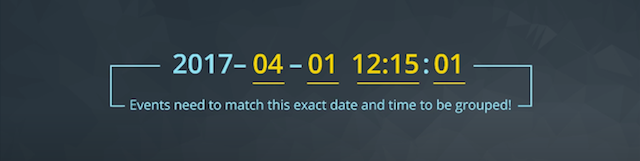

In order to group by day, we will need to adjust all the times on April 1st, 2017 to read: 2017-04-01 00:00:00

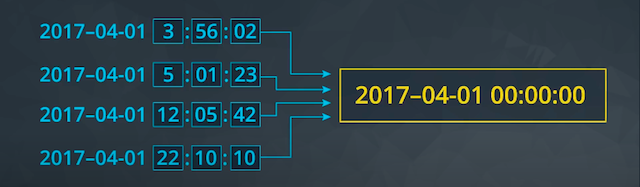

<b>DATE_TRUNC</b> allows you to truncate your date to a particular part of your date-time column. Common truncations are day, month, and year. <a href='https://blog.modeanalytics.com/date-trunc-sql-timestamp-function-count-on/'>Here</a> is a great blog post by Mode Analytics on the power of this function.

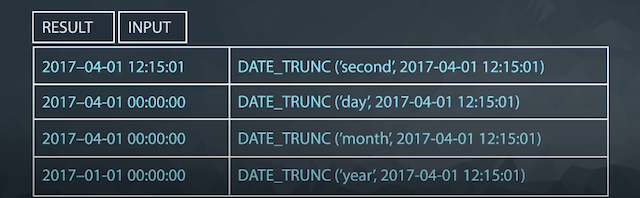

Example using <b>DATE_TRUNC:</b>

Sum the quantities of standard paper ordered by day:
```sql
SELECT DATE_TRUNC('day',occurred_at) AS day,
       SUM(standard_qty) AS standard_qty_sum
FROM orders
GROUP BY DATE_TRUNC('day',occurred_at)
ORDER BY DATE_TRUNC('day',occurred_at)
```

<b>DATE_PART</b> can be useful for pulling a specific portion of a date, but pulling month or day of the week (dow) means that you are no longer keeping the years in order. Rather you are grouping for certain components regardless of which year they belong in. For additional functions you can use with dates, check out the documentation <a href='https://www.postgresql.org/docs/9.1/static/functions-datetime.html'>here</a>. 

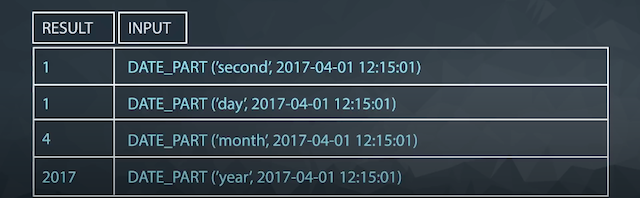

<b>DOW</b> pulls the day of the week with 0 as Sunday and 6 as Saturday

Example using <b>DATE_PART:</b>

On what day of the week are the most sales made?
```sql
SELECT DATE_PART('dow', occurred_at) AS day_of_week,
       SUM(total) AS total_qty
FROM orders
GROUP BY 1
ORDER BY 2 DESC
```
<i>Note: The 1 and 2 identify these columns in the SELECT statement<i>

#### Practice Questions

1. Find the sales in terms of total dollars for all orders in each year, ordered from greatest to least.
```sql
SELECT DATE_PART('year', occurred_at) ord_year, SUM(total_amt_usd) total_spent
FROM orders
GROUP BY 1
ORDER BY 2 DESC;
```
2. In which month of 2014 did Parch & Posey have the greatest sales in terms of total dollars?
```sql
SELECT DATE_PART('month', occurred_at) ord_month, SUM(total_amt_usd) total_spent
FROM orders
WHERE occurred_at BETWEEN '2014-01-01' AND '2015-01-01'
GROUP BY 1
ORDER BY 2 DESC; 
```
3. Which year did Parch & Posey have the greatest sales in terms of total number of orders? 
```sql
SELECT DATE_PART('year', occurred_at) ord_year, COUNT(*) total_sales
FROM orders
GROUP BY 1
ORDER BY 2 DESC;
```
4. Which month did Parch & Posey have the greatest sales in terms of total number of orders?
```sql
SELECT DATE_PART('month', occurred_at) ord_month, COUNT(*) total_sales
FROM orders
GROUP BY 1
ORDER BY 2 DESC; 
```
5. In which month of which year did Walmart spend the most on gloss paper in terms of dollars?
```sql
SELECT DATE_TRUNC('month', o.occurred_at) ord_date, SUM(o.gloss_amt_usd) tot_spent
FROM orders o 
JOIN accounts a
ON a.id = o.account_id
WHERE a.name = 'Walmart'
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1;
```

## CASE Statements

> CASE statements handle 'IF' 'THEN' logic 

**CASE - Expert Tip**

>The CASE statement always goes in the SELECT clause.

>CASE must include the following components: WHEN, THEN, and END. ELSE is an optional component to capture values not specified in 'WHEN' and 'THEN' statements.

You can make any conditional statement using any conditional operator (like WHERE) between WHEN and THEN. This includes stringing together multiple conditional statements using AND and OR.

You can include multiple WHEN statements, as well as an ELSE statement again, to deal with any unaddressed conditions.

**Example:**

Place orders in general groups based on order size
```sql
SELECT account_id, occurred_at, total,
       CASE WHEN total > 500 THEN 'Over 500'
            WHEN total > 300 AND total <= 500 THEN '301 - 500'
            WHEN total > 100 AND total <= 300 THEN '101 - 300'
            ELSE '100 or under' END AS total_group
FROM orders
```

**Example:**

Create a column that divides the standard_amt_usd by the standard_qty to find the unit price for standard paper for each order. Limit the results to the first 10 orders, and include the id and account_id fields. 

The following is a correct solution to the above but it will throw a 'division by zero' error if the standard_qty is zero for any account.
```sql
SELECT id, account_id, standard_amt_usd/standard_qty AS unit_price
FROM orders
LIMIT 10;
```

We can use the CASE statement to get around this error.
```sql
SELECT account_id, 
       CASE WHEN standard_qty = 0 OR standard_qty IS NULL THEN 0
       ELSE standard_amt_usd/standard_qty END AS unit_price
FROM orders
LIMIT 10;
```

**Practice Questions**

1. Write a query to display for each order, the account ID, total amount of the order, and the level of the order - 'Large' or 'Small' - depending on if the order is USD3000 or more, or smaller than USD3000.
```sql
SELECT account_id, total_amt_usd,
     CASE WHEN total_amt_usd > 3000 THEN 'Large'
     ELSE 'Small' END AS order_level
FROM orders;
```
2. Write a query to display the number of orders in each of three categories, based on the total number of items in each order. The three categories are: 'At Least 2000', 'Between 1000 and 2000' and 'Less than 1000'.
```sql
SELECT CASE WHEN total >= 2000 THEN 'At Least 2000'
     WHEN total >= 1000 AND total < 2000 THEN 'Between 1000 and 2000'
     ELSE 'Less than 1000' END AS order_category,
COUNT(*) AS order_count
FROM orders
GROUP BY 1;
```
3. We would like to understand 3 different levels of customers based on the amount associated with their purchases. The top level includes anyone with a Lifetime Value (total sales of all orders) greater than 200,000 usd. The second level is between 200,000 and 100,000 usd. The lowest level is anyone under 100,000 usd. Provide a table that includes the level associated with each account. You should provide the account name, the total sales of all orders for the customer, and the level. Order with the top spending customers listed first.
```sql
SELECT a.name, SUM(total_amt_usd) total_spent, 
     CASE WHEN SUM(total_amt_usd) > 200000 THEN 'top'
     WHEN  SUM(total_amt_usd) > 100000 THEN 'middle'
     ELSE 'low' END AS customer_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id 
GROUP BY a.name
ORDER BY 2 DESC;
```
4. We would now like to perform a similar calculation to the first, but we want to obtain the total amount spent by customers only in 2016 and 2017. Keep the same levels as in the previous question. Order with the top spending customers listed first.
```sql
SELECT a.name, SUM(total_amt_usd) total_spent, 
     CASE WHEN SUM(total_amt_usd) > 200000 THEN 'top'
     WHEN  SUM(total_amt_usd) > 100000 THEN 'middle'
     ELSE 'low' END AS customer_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id
WHERE occurred_at > '2015-12-31' 
GROUP BY 1
ORDER BY 2 DESC;
```
5. We would like to identify top performing sales reps, which are sales reps associated with more than 200 orders. Create a table with the sales rep name, the total number of orders, and a column with top or not depending on if they have more than 200 orders. Place the top sales people first in your final table.
```sql
SELECT s.name, COUNT(*) num_ords,
     CASE WHEN COUNT(*) > 200 THEN 'top'
     ELSE 'not' END AS sales_rep_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id 
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.name
ORDER BY 2 DESC;
```
6. The previous didn't account for the middle, nor the dollar amount associated with the sales. Management decides they want to see these characteristics represented as well. We would like to identify top performing sales reps, which are sales reps associated with more than 200 orders or more than 750000 in total sales. The middle group has any rep with more than 150 orders or 500000 in sales. Create a table with the sales rep name, the total number of orders, total sales across all orders, and a column with top, middle, or low depending on this criteria. Place the top sales people based on dollar amount of sales first in your final table. You might see a few upset sales people by this criteria!
```sql
SELECT s.name, COUNT(*), SUM(o.total_amt_usd) total_spent, 
     CASE WHEN COUNT(*) > 200 OR SUM(o.total_amt_usd) > 750000 THEN 'top'
     WHEN COUNT(*) > 150 OR SUM(o.total_amt_usd) > 500000 THEN 'middle'
     ELSE 'low' END AS sales_rep_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id 
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.name
ORDER BY 3 DESC;
```